# Gunhoo Park
# Homework #2
# USC ID: 8585425433

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1.

## (a) Download the data

In [5]:
# Source: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

In [6]:
df=pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## (b) Exploring data

### i.How many rows are in this data set? How many columns? What do the rows and columns represent?

In [9]:
# Source: https://www.freecodecamp.org/news/pandas-count-rows-how-to-get-the-number-of-rows-in-a-dataframe/#:~:text=in%20the%20dataframe.-,len(df.,of%20rows%20in%20the%20dataframe.
len(df.index)

9568

9568 rows

In [11]:
# Source: https://stackoverflow.com/questions/20297332/how-do-i-retrieve-the-number-of-columns-in-a-pandas-data-frame
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

5 colums

Reference: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant  
The row represents the data of column values.  
The column have 5 variables: AT, V, AP, RH, and PE.  
The 'AT' represents a degree(C) in the range between 1.81'C and 37.11'C.  
The 'V' represents a exhuast vacuum(cm Hg) in the range between 25.36 and 81.56 cm Hg.  
The 'AP' represents a ambient pressure(milibar) in the range between 992.89 and 1033.30 milibar.  
The 'RH' represents a relative humidity(%) in the range of 25.56% to 100.16%.  
The 'PE' represents a electrical energy output(MW) in the range of 420.26 to 495.76MW.  

### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

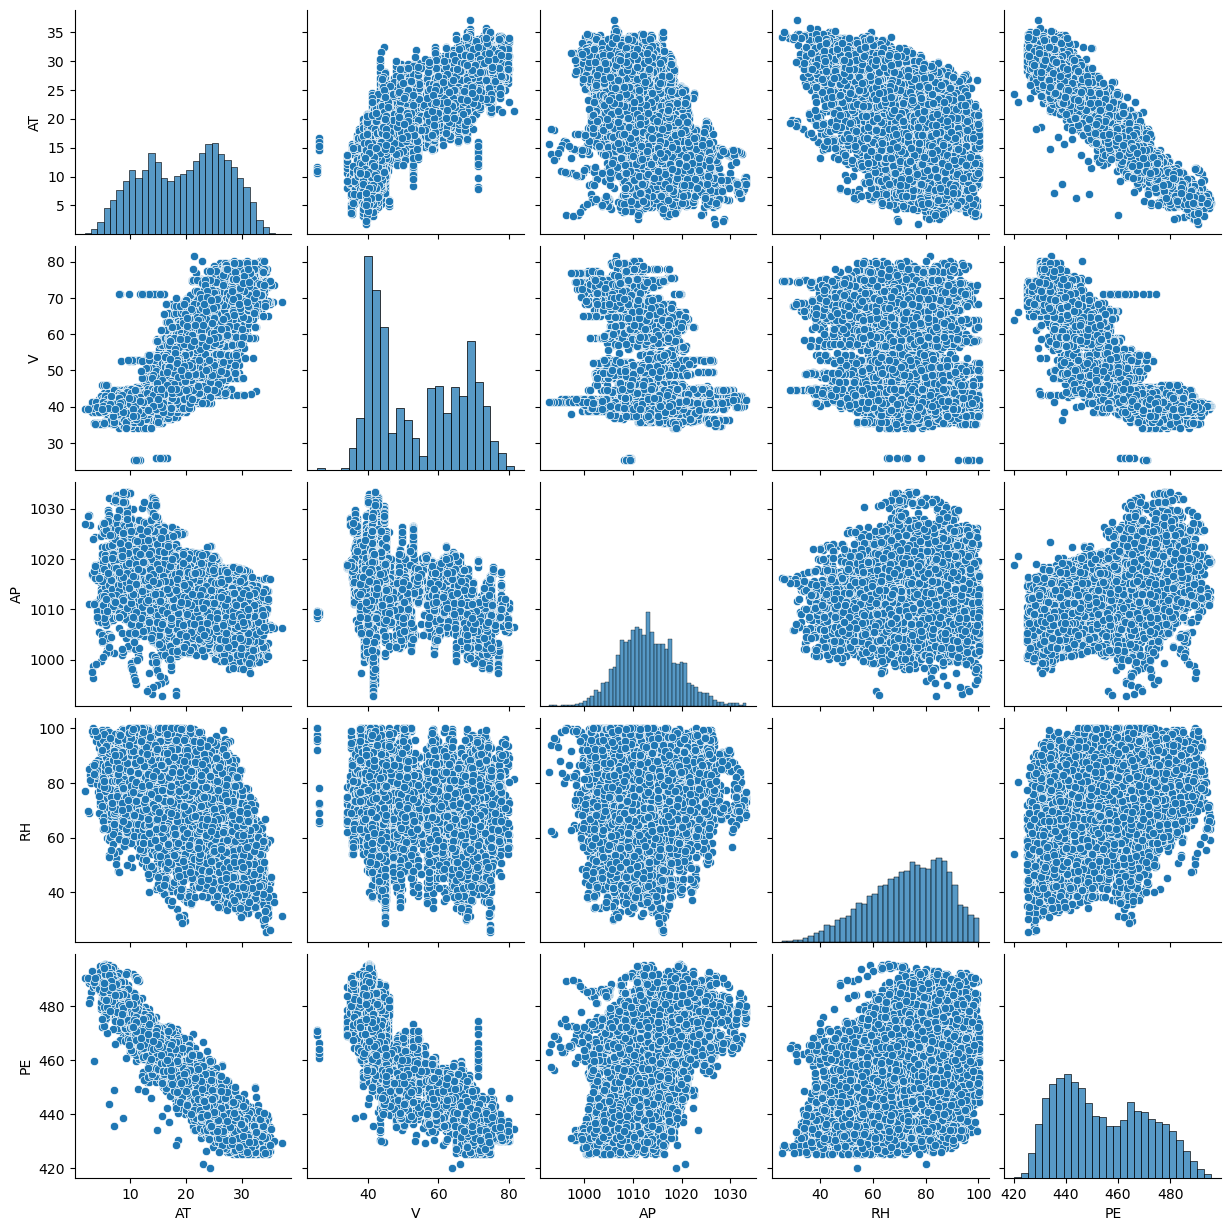

In [15]:
# Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df)
plt.show()

### iii. What are the mean, the median, range, first and third quartiles, and interquartiles ranges of each of the variables in the dataset? Summarize them in a table. 

In [17]:
# Source: https://www.w3schools.com/python/pandas/ref_df_describe.asp
# Source: https://www.w3schools.com/python/pandas/ref_df_median.asp
basic_information = df.describe()
median = df.median().to_frame().rename(columns={0:'median'}).T
interquartile = (basic_information.iloc[6]-basic_information.iloc[4]).to_frame().rename(columns={0:'interquartile'}).T
range = (basic_information.iloc[7] - basic_information.iloc[3]).to_frame().rename(columns={0:'range'}).T

In [18]:
pd.concat([basic_information, interquartile, range, median])

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000
range,35.300000,56.200000,40.410000,74.600000,75.500000


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [20]:
# Source: https://www.geeksforgeeks.org/linear-regression-python-implementation/
def estimate_coef(x, y):
    # number of observations/points   
    n = np.size(x)   
    
    # mean of x and y vector   
    m_x = np.mean(x)   
    m_y = np.mean(y)   

    # calculating cross-deviation and deviation about x   
    SS_xy = np.sum(y*x) - n*m_y*m_x   
    SS_xx = np.sum(x*x) - n*m_x*m_x   

    # calculating regression coefficients   
    b_1 = SS_xy / SS_xx   
    b_0 = m_y - b_1*m_x   

    return (b_0, b_1)

In [21]:
# Source: https://www.geeksforgeeks.org/linear-regression-python-implementation/
from scipy import stats
def plot_regression_line(x, y, b, x_axis, y_axis, title):
    # plotting the actual points as scatter plot   
    plt.scatter(x, y, color = "blue", marker = "o", s = 30)   

    # predicted response vector   
    y_pred = b[0] + b[1]*x   

    # outliers: Source: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
    # Threshold: Source: https://www.machinelearningplus.com/machine-learning/how-to-detect-outliers-with-z-score/
    # Based on Piazza @204, set threshold as 3
    r = y - y_pred
    z_score = np.abs(stats.zscore(r))
    outlier_indices = np.where(z_score > 3)[0]
    print('number of outliers: ', len(outlier_indices))

    print(stats.linregress(x, y))
    
    # plotting the regression line   
    plt.plot(x, y_pred, color = "black")  
    plt.scatter(x[outlier_indices], y[outlier_indices], color="red", marker="x", s=100, label='Outliers')

    # putting labels   
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)

In [22]:
coef_at = estimate_coef(df['AT'], df['PE'])

number of outliers:  42
LinregressResult(slope=-2.1713199585177945, intercept=497.03411989276674, rvalue=-0.9481284704167596, pvalue=0.0, stderr=0.0074432871256579405, intercept_stderr=0.15643382142090076)


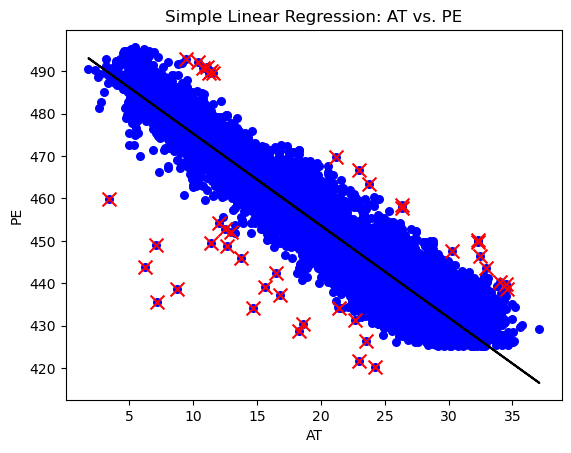

In [23]:
plot_regression_line(df['AT'], df['PE'], coef_at, 'AT', 'PE', 'Simple Linear Regression: AT vs. PE')

The p-value for AT is 0.0, which is very small, so, linear regression for AT is statistically significant.
There is no outliers when I set the threshold as 2.

In [25]:
coef_v = estimate_coef(df['V'], df['PE'])

number of outliers:  33
LinregressResult(slope=-1.1681351265557118, intercept=517.8015263083859, rvalue=-0.8697803096577877, pvalue=0.0, stderr=0.006775665282736557, intercept_stderr=0.3778971421778303)


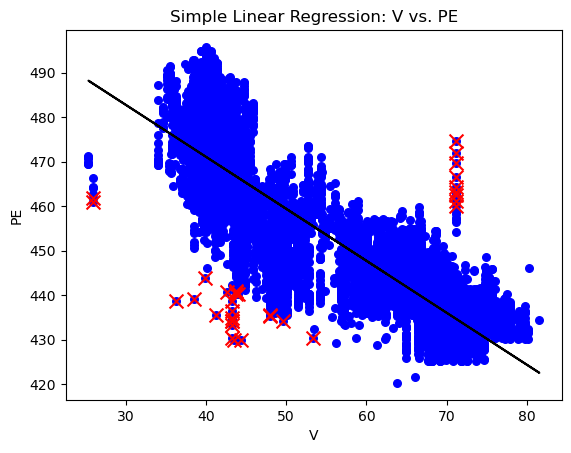

In [26]:
plot_regression_line(df['V'], df['PE'], coef_v, 'V', 'PE', 'Simple Linear Regression: V vs. PE')

The p-value for V is 0.0, which is very small, so, linear regression for V is statistically significant.
There is 33 outliers when I set the threshold as 2.

In [28]:
coef_ap = estimate_coef(df['AP'], df['PE'])

number of outliers:  28
LinregressResult(slope=1.4898716733991129, intercept=-1055.2609889844384, rvalue=0.5184290273615735, pvalue=0.0, stderr=0.025125907932584103, intercept_stderr=25.459491547392272)


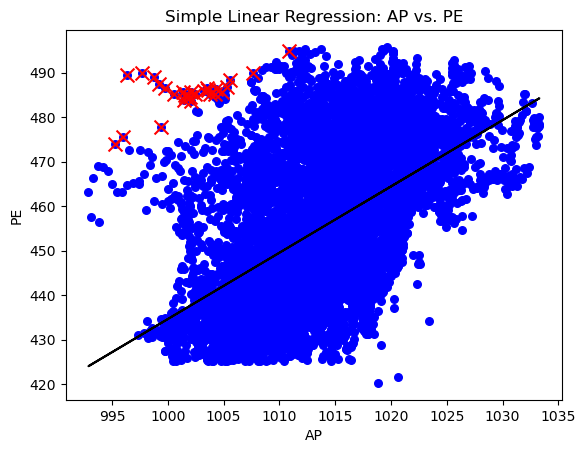

In [29]:
plot_regression_line(df['AP'], df['PE'], coef_ap, 'AP', 'PE', 'Simple Linear Regression: AP vs. PE')

The p-value for AP is 0.0, which is very small, so, linear regression for AP is statistically significant.
There is 28 outliers when I set the threshold as 2.

In [31]:
coef_rh = estimate_coef(df['RH'], df['PE'])

number of outliers:  2
LinregressResult(slope=0.45565010226298014, intercept=420.96176615548393, rvalue=0.38979409979010177, pvalue=0.0, stderr=0.011006378807584876, intercept_stderr=0.8227113037852687)


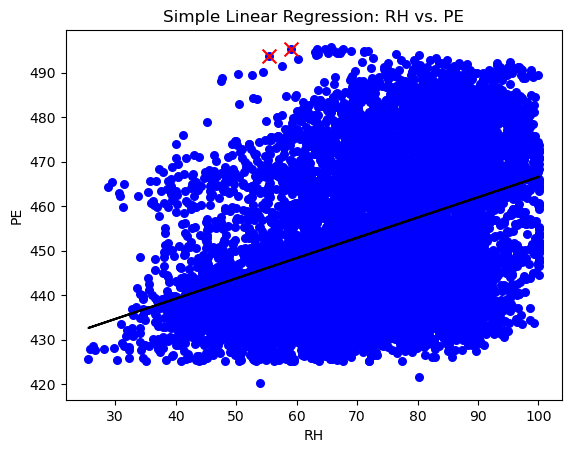

In [32]:
plot_regression_line(df['RH'], df['PE'], coef_rh, 'RH', 'PE', 'Simple Linear Regression: RH vs. PE')

The p-value for RH is 0.0, which is very small, so, linear regression for RH is statistically significant.
There is 2 outliers when I set the threshold as 2.

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [35]:
# Source: https://www.geeksforgeeks.org/linear-regression-python-implementation/
from sklearn import linear_model
x = df.drop(['PE'],axis=1)
y = df['PE']
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [36]:
print('Coefficients: ', reg.coef_)

Coefficients:  [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


In [37]:
print('Variance score: {}'.format(reg.score(x, y)))

Variance score: 0.9286960898122536


In [38]:
print('intercept_multipleregression: {}'.format(reg.intercept_))

intercept_multipleregression: 454.60927431531036


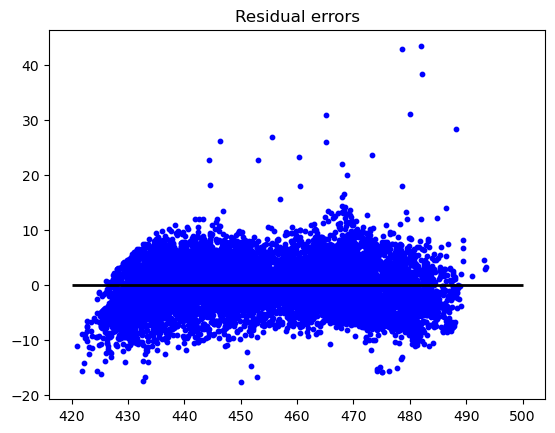

In [39]:
# plotting residual errors in training data 
plt.scatter(reg.predict(x), reg.predict(x) - y, color="blue", s=10, label='Train data') 

plt.hlines(y=0, xmin=420, xmax=500, linewidth=2, color='black') 

plt.title("Residual errors") 
# method call for showing the plot 
plt.show()

In [40]:
# Source: https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html#statsmodels.tools.tools.add_constant
# Source: https://stackoverflow.com/questions/30650257/ols-using-statsmodel-formula-api-versus-statsmodel-api
import statsmodels.api as sm

x_multi = sm.add_constant(x)
multi_model = sm.OLS(y, x_multi)
multi_reg = multi_model.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:18   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

All p-values are very small, so all of them are statistically significant.  
Therefore, we can reject the null.

## e. Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. 

In [43]:
coef_mul = reg.coef_

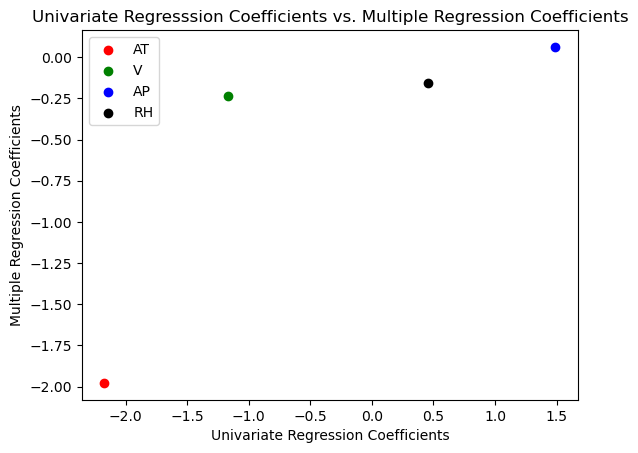

In [44]:
plt.scatter(x=coef_at[1], y=coef_mul[0], color='red')
plt.scatter(x=coef_v[1], y=coef_mul[1], color='green')
plt.scatter(x=coef_ap[1], y=coef_mul[2], color='blue')
plt.scatter(x=coef_rh[1], y=coef_mul[3], color='black')

plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Univariate Regresssion Coefficients vs. Multiple Regression Coefficients")

plt.legend(['AT','V', 'AP', 'RH'])
plt.show()

## (f) Is there evidence of nonlinear association between any of the predictors and the response?

In [46]:
# Source: https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/?ref=header_outind
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression(x, y, x_axis, y_axis, title):
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x.values.reshape(-1,1))
    # poly.fit(x_poly, y)

    p_mod = sm.OLS(y, x_poly)
    p_reg = p_mod.fit()
    
    p_reg_model = LinearRegression()
    p_reg_model.fit(x_poly, y)
    
    p_y_pred = p_reg_model.predict(x_poly)

    plt.scatter(x, y)
    plt.scatter(x, p_y_pred)

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    
    plt.show()
    print(p_reg.summary())

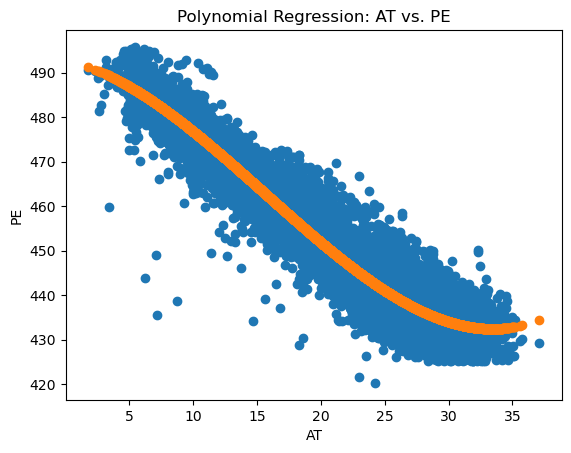

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:19   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [47]:
polynomial_regression(df['AT'], df['PE'], 'AT', 'PE', 'Polynomial Regression: AT vs. PE')

Since p-value is very small, which means statistically significant, rejecting the null is possible. Therefore, it is an evidence of nonlinear association between AT and PE.

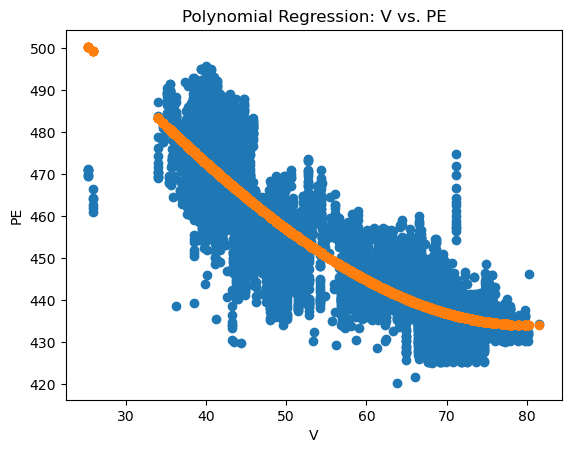

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:19   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [49]:
polynomial_regression(df['V'], df['PE'], 'V', 'PE', 'Polynomial Regression: V vs. PE')

The p-value for x3 is very small, indicating that we can reject the null hypothesis for this term. Therefore, even though the quadratic term(x2) does not show evidence of a nonlinear association(with high p-value), cubic term(x3) does provide the evidence of a nonlinear association between V and PE.

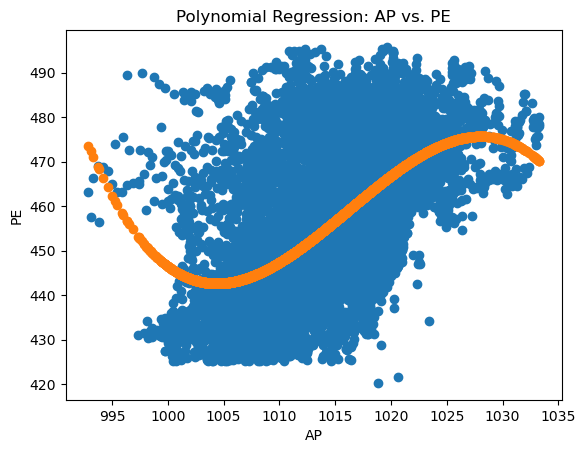

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [51]:
polynomial_regression(df['AP'], df['PE'], 'AP', 'PE', 'Polynomial Regression: AP vs. PE')

Since p-value is very small, which means statistically significant, we can reject the null. Therefore, it is an evidence of nonlinear association between AP and PE.

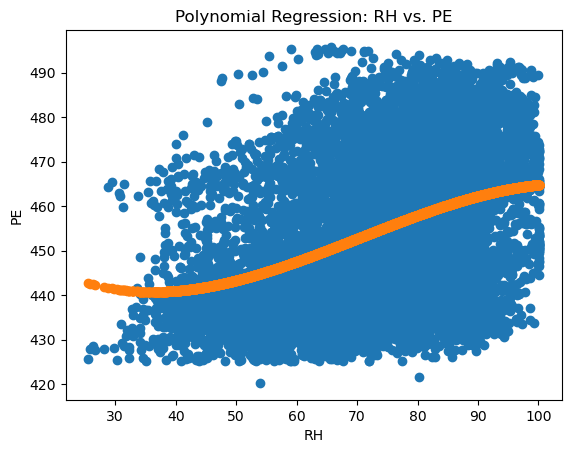

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

In [53]:
polynomial_regression(df['RH'], df['PE'], 'RH', 'PE', 'Polynomial Regression: RH vs. PE')

Since p-value is very small, which means statistically significant, we can reject the null. Therefore, it is an evidence of nonlinear association between RH and PE.

## (g) Is there evidence of association of interactions of predictors with the response?

In [56]:
# List of column pairs to multiply
column_pairs = [('AT', 'V'), ('AT', 'AP'), ('AT', 'RH'), ('V', 'AP'), ('V', 'RH'), ('AP', 'RH')]

# Create interaction terms
for col1, col2 in column_pairs:
    x[f'{col1}*{col2}'] = x[col1] * x[col2]

In [57]:
a_results = sm.OLS(y, sm.add_constant(x)).fit()
print(a_results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

Based on the results, there is an evidence of association between serveral interaction terms.  
The interactions between AT & V, AT & RH, V & AP, and AP & RH are statistically significant, so we can reject the null.

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values. Test both models on the remaining points and report your train and test MSEs.

In [60]:
# Source: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

In [61]:
def train_regression_model(x,y, title):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    x_train = sm.add_constant(x_train)
    x_test = sm.add_constant(x_test)
    
    model = sm.OLS(y_train, x_train)
    result = model.fit()
    print(result.summary())

    train_pred = result.predict(x_train)
    test_pred = result.predict(x_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print()
    print('train MSE ', title, ' : ', train_mse)
    print('test MSE ', title, ' : ', test_mse)

First, Do all possible interactions

In [63]:
x['AT*AT']=x['AT']*x['AT']
x['V*V']=x['V']*x['V']
x['AP*AP']=x['AP']*x['AP']
x['RH*RH']=x['RH']*x['RH']

In [64]:
train_regression_model(x,y, 'with all possible interaction')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

We can identify that the p-values of 'AT\*AP', 'V\*AP', 'V\*RH', and 'V\*V' are not so small, therefore, remove them.

In [66]:
x.drop(['AT*AP', 'V*AP', 'V*RH', 'V*V'],axis=1 ,inplace=True)

In [67]:
train_regression_model(x,y, 'with best possible interaction')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.046e+04   1091.512     -9.581      0.0

To compare basic(wihtout any interaction) model, remove all possible remaining interactions

In [69]:
x.drop(['AT*V',	'AT*RH', 'AP*RH', 'AT*AT', 'AP*AP', 'RH*RH'],axis=1 ,inplace=True)

In [70]:
train_regression_model(x,y, 'without any interaction')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

We can confirm that we can improve our model using possible interaction terms.

## (i) KNN Regression

#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [74]:
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
train_mse, test_mse = {}, {}
for k in np.arange(1, 101, 1):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(x_train, y_train)
    train_y_predict = knr.predict(x_train)
    test_y_predict = knr.predict(x_test)
    train_mse[1/k] = mean_squared_error(y_train, train_y_predict)
    test_mse[1/k] = mean_squared_error(y_test, test_y_predict)
    # print(k, train_mse[1/k], test_mse[1/k])

In [76]:
k_values = list(train_mse.keys())
train_error_values = list(train_mse.values())
test_error_values = list(test_mse.values())

min_test_k = min(test_mse, key=test_mse.get)
min_train_k = min(train_mse, key=train_mse.get)

print(min_train_k, train_mse[min_train_k], test_mse[min_train_k])
print(min_test_k, train_mse[min_test_k], test_mse[min_test_k])

1.0 0.0 20.33254312086381
0.2 10.600768887561596 15.726819842563568


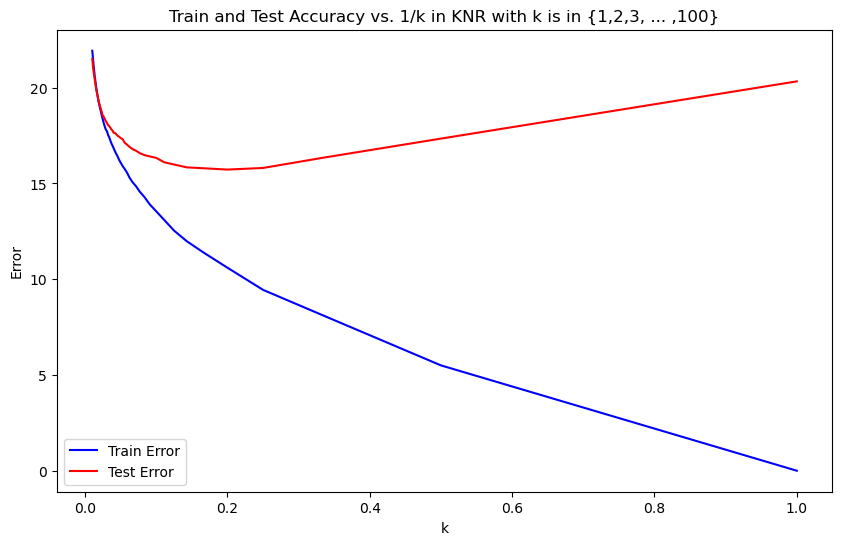

In [77]:
plt.figure(figsize=(10,6))
plt.plot(k_values, train_error_values, label='Train Error', color='blue')
plt.plot(k_values, test_error_values, label='Test Error', color='red')
plt.title('Train and Test Accuracy vs. 1/k in KNR with k is in {1,2,3, ... ,100}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

When k = 1, the train MSE is smallest, which is 0.0, and when k = 5, the test MSE is the smallest, which is 15.726819842563568.  

In [79]:
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()
scaled_model = scaler.fit(x_train)
x_train_scaled = scaled_model.transform(x_train)
x_test_scaled = scaled_model.transform(x_test)
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)
scaled_train_mse, scaled_test_mse = {}, {}
for k in np.arange(1, 101, 1):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(x_train_scaled, y_train)
    train_y_predict = knr.predict(x_train_scaled)
    test_y_predict = knr.predict(x_test_scaled)
    scaled_train_mse[1/k] = mean_squared_error(y_train, train_y_predict)
    scaled_test_mse[1/k] = mean_squared_error(y_test, test_y_predict)
    # print(k, train_mse[1/k], test_mse[1/k])

In [81]:
k_values = list(train_mse.keys())
scaled_train_error_values = list(scaled_train_mse.values())
scaled_test_error_values = list(scaled_test_mse.values())

scaled_min_test_k = min(scaled_test_mse, key=scaled_test_mse.get)
scaled_min_train_k = min(scaled_train_mse, key=scaled_train_mse.get)

print(scaled_min_train_k, scaled_train_mse[scaled_min_train_k], scaled_test_mse[scaled_min_train_k])
print(scaled_min_test_k, scaled_train_mse[scaled_min_test_k], scaled_test_mse[scaled_min_test_k])

1.0 0.0 18.298757053291535
0.25 8.454347681797822 14.291333431295715


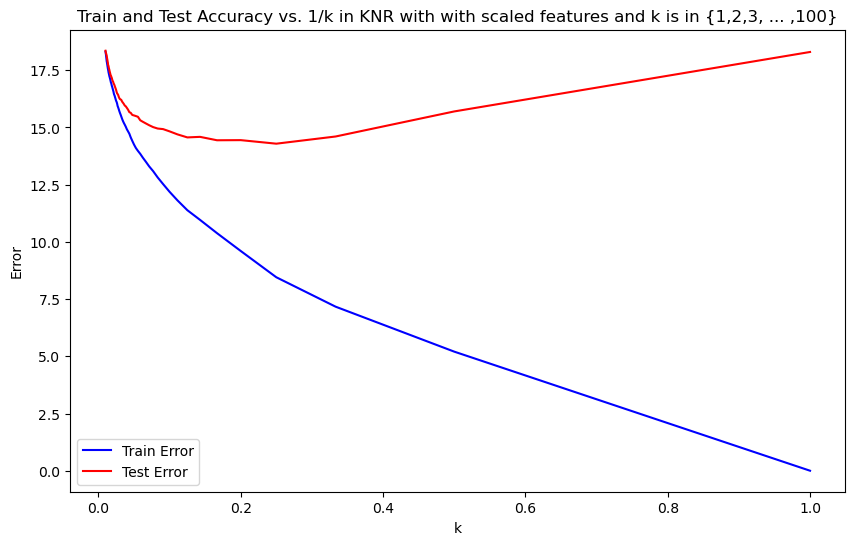

In [82]:
plt.figure(figsize=(10,6))
plt.plot(k_values, scaled_train_error_values, label='Train Error', color='blue')
plt.plot(k_values, scaled_test_error_values, label='Test Error', color='red')
plt.title('Train and Test Accuracy vs. 1/k in KNR with with scaled features and k is in {1,2,3, ... ,100}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

When k = 1, the train MSE is smallest, which is 0.0, and when k = 4, the test MSE is the smallest, which is 14.291333431295715.  

## (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

The smallest test error in KNN Regression with scaled features is 14.291333431295715.  
The smallest test error in KNN Regression without scaling is 15.726819842563568.  
The smallest test error in linear regression model with interaction terms is 18.647312478563066.  
The smallest test error in linear regression model without any interaction terms is 21.239856938225497.  
The best(smallest) test error above all models is KNN Regression with scaled features. This is because KNN relies on distance calculations between data points and especially, all features are eqaully contributed to distances in scaling. 

# 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

## (a) The sample size n is extremely large, and the number of predictiors p is small 

The performace of flexible statistical learning method would be better when the total sample size n is extremely large and predictors p is small. This is because we can get more likely high accurate estimating the relationship. Intricate patterns can be captured by flexible methods and inflexible method might miss the nonlinearities.

## (b) The number of predictors p is extremely large, and the number of observations n is small.

The performace of inflexible would be better than flexible method. This is becaue the possiblilty overfitting is high when the number of observations is small and the number of predictors p is extremely large, which is much larger than the number of observations n. Therefore, inflexible method, which is more simple than flexible method, is less likely to overfit.

## (c) The relationship between the predictors and response is highly non-linear.

The performance of flexible method would be better. This is because flexible method can fit complex model, nonlinear relationships, however, the inflexible method might be hard to find the relationship in nonlinear data.

## (d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

Inflexible method would perform better. This is because high variance of error terms means the data have more widely scattered points and random fluctuations, which can cause the overfitting in flexible methods. However, inflexible method is less likely to become overfitting when the variance of the error terms is extremely hgih.

# 3. ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.  
| Obs. |  X1  |  X2  |  X3  |   Y   |
|:----:|:----:|:----:|:----:|:-----:|
|  1   |   0  |   3  |   0  |  Red  |
|  2   |   2  |   0  |   0  |  Red  |
|  3   |   0  |   1  |   3  |  Red  |
|  4   |   0  |   1  |   2  | Green |
|  5   |  -1  |   0  |   1  | Green |
|  6   |   1  |   1  |   1  |  Red  |


Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.Red  |


## (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

Euclidean distance = sqrt((x1-0)^2 + (x2-0)^2 + (x3-0)^2).  

1. sqrt(0+9+0) = 3
2. sqrt(4+0_0) = 2
3. sqrt(0+1+9) = sqrt(10) = 3.162
4. sqrt(0+1+4) = sqrt(5) = 2.236
5. sqrt(1+0+1) = sqrt(2) = 1.414
6. sqrt(1+1+1) = sqrt(3) = 1.732

## (b) What is our prediction with K = 1? Why?

Observation 5. This is because the euclidean distance of observation 5 is 1.414, which is the nearest neighbor to the test point with given k = 1.  Thus, we can predict that is 'Green'.

## (c) What is our prediction with K = 3? Why?


Observation 2, 5, 6 since k(neighbors) = 3. Observation the output of Obs.2 and Obs.6 is 'Red' and the output of Obs.5 is 'Green'. Two of total 3 neighbors predict the output is 'Red', so our prediction is 'Red'.

## (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

We can expect the best value for K to be small when the Bayes decision boundary is highly nonlinear. This is because a small k concentrate on the nearest neighbors, which can do better, which means that it can capture local patterns and follow the nonlinear decision boundary more closely than a large k. When k is large, this can miss the local patterns. However, when k is extremely small(e.x. k=1), there is a risk of overfitting, therefore, is must be balanced to avoid overfitting while a small K is the best value.